In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

#Loading training data
X_tr = []
Y_tr = []
dir_train = './Data/train/'
for subdir in os.listdir(dir_train):
    for file in os.listdir(dir_train + subdir):
        img = plt.imread(dir_train + subdir + '/' + file)
        label = subdir
        X_tr.append(img)
        Y_tr.append(label)
        
X_train = np.array(X_tr)
y_train = np.array(Y_tr)

print(f'Shape of training data: {X_train.shape}')
print(f'Shape of training Label: {y_train.shape}')


Shape of training data: (50000, 32, 32, 3)
Shape of training Label: (50000,)


In [2]:
#Loading testing data
X_te = []
Y_te = []
dir_test = './Data/test/'
for subdir in os.listdir(dir_test):
    for file in os.listdir(dir_test + subdir):
        img = plt.imread(dir_test + subdir + '/' + file)
        label = subdir
        X_te.append(img)
        Y_te.append(label)
        
X_test = np.array(X_te)
y_test = np.array(Y_te)

print(f'Shape of testing data: {X_test.shape}')
print(f'Shape of testing Label: {y_test.shape}')

Shape of testing data: (10000, 32, 32, 3)
Shape of testing Label: (10000,)


In [3]:
# Defining class for KNN implementation
class KNN(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError(f'Invalid value {num_loops} for num_loops')
        return self.predict_labels(dists, k=k)
    
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train), dtype=np.longlong)
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = abs(X[i].sum() - self.X_train[j].sum())
#        dists = np.zeros((10, 100), dtype=np.longlong)
#        for i in range(10):
#            for j in range(100):
#                dists[i, j] = abs(X[i].sum() - self.X_train[j].sum())
#       dists[0, 0] = X[0].sum() - self.X_train[0].sum()
#       for i in range(10):
#           for j in range(100):
#               print(str(dists[i, j]) + ',', end=' ')
#           print()
        return dists
        
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = [''] * num_test
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            y_pred[i]= max(closest_y, key=closest_y.count)
        return y_pred

In [4]:
#calculating distances neighbour distances for test values
classifier = KNN()
classifier.train(X_train, y_train)
dists = classifier.compute_distances(X_test)

<ipython-input-3-8fe99e307183>:23: RuntimeWarning: overflow encountered in ulong_scalars
  dists[i, j] = abs(X[i].sum() - self.X_train[j].sum())


In [11]:
#comparing K values performance
K_values = []
Accuracy_values = []
for j in range(1, 21):
    y_test_pred = classifier.predict_labels(dists, k=j)
    num_correct = 0
    for i in range(len(y_test_pred)):
        if y_test[i] == y_test_pred[i]:
            num_correct += 1
    accuracy = float(num_correct) / len(y_test_pred)
    K_values.append(j)
    Accuracy_values.append(accuracy)

print(len(K_values))
    
for i in range(20):
    print(f'Accuracy for K value of {K_values[i]} is: {Accuracy_values[i]}')

20
Accuracy for K value of 1 is: 0.1143
Accuracy for K value of 2 is: 0.1143
Accuracy for K value of 3 is: 0.1162
Accuracy for K value of 4 is: 0.1206
Accuracy for K value of 5 is: 0.1257
Accuracy for K value of 6 is: 0.1278
Accuracy for K value of 7 is: 0.1293
Accuracy for K value of 8 is: 0.1301
Accuracy for K value of 9 is: 0.134
Accuracy for K value of 10 is: 0.1327
Accuracy for K value of 11 is: 0.1334
Accuracy for K value of 12 is: 0.1355
Accuracy for K value of 13 is: 0.1368
Accuracy for K value of 14 is: 0.1381
Accuracy for K value of 15 is: 0.1385
Accuracy for K value of 16 is: 0.1354
Accuracy for K value of 17 is: 0.1382
Accuracy for K value of 18 is: 0.1386
Accuracy for K value of 19 is: 0.1377
Accuracy for K value of 20 is: 0.137


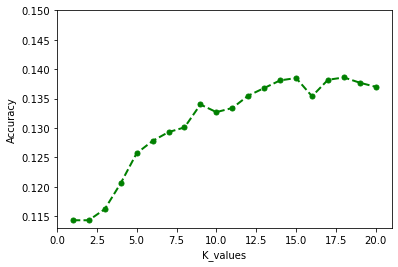

In [41]:
#plotting accuracy for the K values
X = np.array(K_values)
Y = np.array(Accuracy_values)
plt.plot(X, Y, 'go--', linewidth=2, markersize=5)
plt.ylim([0.113, 0.15])
plt.xlim([0, 21])
plt.xlabel('K_values')
plt.ylabel('Accuracy')
plt.show()

Analysis of the results <br><br>
KNN is a simple supervised algorithm for machine learning. It can be used for both classification and regression problem. In the above implementation an attept was undertaken to classify the cifar 10 images dataset. From the accuracy plot it is clear that KNN is not the best algorithm for the purpose of image classification since the maximum accuracy is only 0.1386. The best accuracy value is achieved at the K value of 18. The second best accuracy value is 0.1585, which is achieved at the K value of 15. There maybe better ways to implement this algorithm, but for this implementation, the accuracy is not at all satisfactory. So it can be concluded that KNN is not a suitable algorithm for image classification.